## READING DATA AND FORMATIING 

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("Nifty50.csv")

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df = df[['Open', 'High', 'Low', 'Close']]
df

,Open,High,Low,Close
Date,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805
...,...,...,...,...
2023-04-26,17767.300781,17827.750000,17711.199219,17813.599609
2023-04-27,17813.099609,17931.599609,17797.900391,17915.050781
2023-04-28,17950.400391,18089.150391,17885.300781,18065.000000


## calculating daily returns 

In [2]:
# Calculate the daily returns by dividing the current day's close price by the previous day's close price and subtracting 1. You can use the shift() function to get the previous day's close price:
# df['Daily_Return'] = round(df['Close'] / df['Close'].shift(1) - 1,3)
df['Daily_Return'] = round(df['Close'].pct_change(),3)

# #since first in NaN
df = df.iloc[1:, : ]
df

,Open,High,Low,Close,Daily_Return
Date,,,,,
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0.011
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0.041
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0.003
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0.019
2007-09-24,4837.149902,4941.149902,4837.149902,4932.200195,0.020
...,...,...,...,...,...
2023-04-26,17767.300781,17827.750000,17711.199219,17813.599609,0.002
2023-04-27,17813.099609,17931.599609,17797.900391,17915.050781,0.006
2023-04-28,17950.400391,18089.150391,17885.300781,18065.000000,0.008


## describe

In [3]:
round(df['Daily_Return'].describe(),3)

count    3827.000
mean        0.000
std         0.014
min        -0.130
25%        -0.006
50%         0.001
75%         0.007
max         0.177
Name: Daily_Return, dtype: float64

In [4]:
df[df['Daily_Return'] == df['Daily_Return'].max()]

,Open,High,Low,Close,Daily_Return
Date,,,,,
2009-05-18,3673.149902,4384.299805,3673.149902,4323.149902,0.177


In [5]:
df[df['Daily_Return'] == df['Daily_Return'].min()]


,Open,High,Low,Close,Daily_Return
Date,,,,,
2020-03-23,7945.700195,8159.25,7583.600098,7610.25,-0.13


## historgram

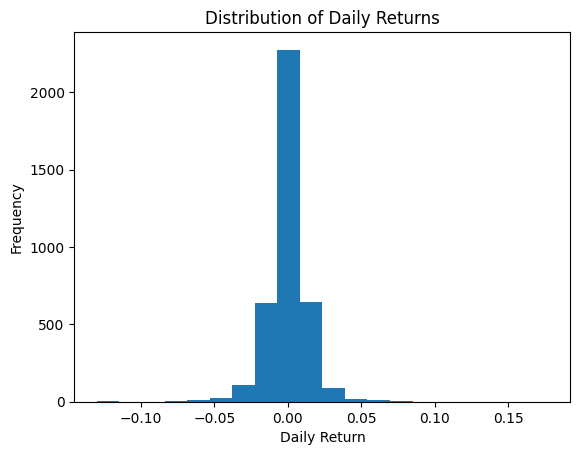

In [6]:
import matplotlib.pyplot as plt

plt.hist(df['Daily_Return'], bins=20)
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns')
plt.show()

<Axes: xlabel='Date'>

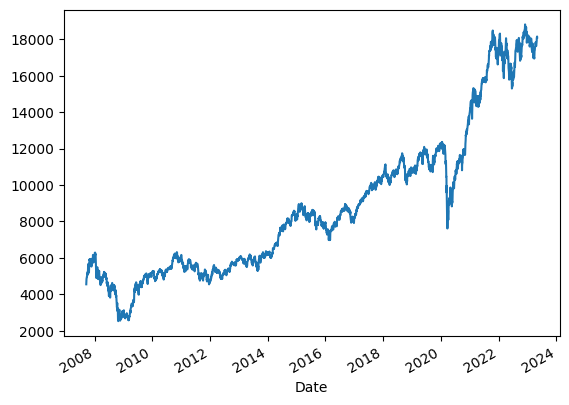

In [7]:
df['Close'].plot()

<Axes: xlabel='Date'>

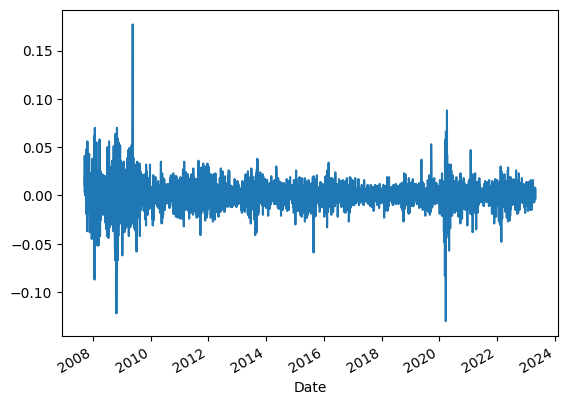

In [8]:
df['Daily_Return'].plot()

## for particular year or month

In [9]:
df.loc['2020']

,Open,High,Low,Close,Daily_Return
Date,,,,,
2020-01-01,12202.150391,12222.200195,12165.299805,12182.500000,0.001
2020-01-02,12198.549805,12289.900391,12195.250000,12282.200195,0.008
2020-01-03,12261.099609,12265.599609,12191.349609,12226.650391,-0.005
2020-01-06,12170.599609,12179.099609,11974.200195,11993.049805,-0.019
2020-01-07,12079.099609,12152.150391,12005.349609,12052.950195,0.005
...,...,...,...,...,...
2020-12-24,13672.150391,13771.750000,13626.900391,13749.250000,0.011
2020-12-28,13815.150391,13885.299805,13811.549805,13873.200195,0.009
2020-12-29,13910.349609,13967.599609,13859.900391,13932.599609,0.004


In [10]:
df.loc['2020','Daily_Return'].describe()

count    250.000000
mean       0.000732
std        0.019728
min       -0.130000
25%       -0.005000
50%        0.002000
75%        0.009000
max        0.088000
Name: Daily_Return, dtype: float64

<Axes: xlabel='Date'>

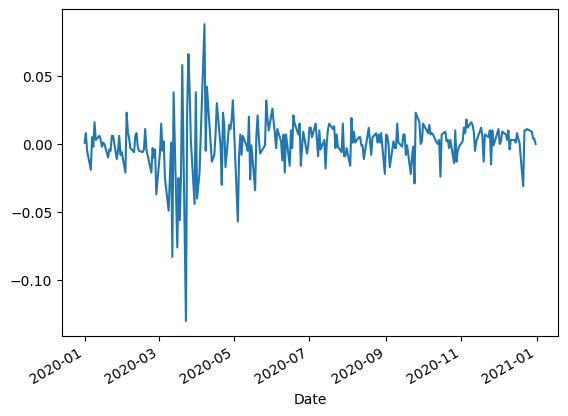

In [11]:
df.loc['2020','Daily_Return'].plot()

### comparing

In [12]:
df['monthName'] = df.index.month_name()
df['dayName'] = df.index.day_name()
df['quarter'] = df.index.quarter

C:\Users\Admin\AppData\Local\Temp\ipykernel_3108\3957861872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['monthName'] = df.index.month_name()
C:\Users\Admin\AppData\Local\Temp\ipykernel_3108\3957861872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayName'] = df.index.day_name()
C:\Users\Admin\AppData\Local\Temp\ipykernel_3108\3957861872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [13]:
df

,Open,High,Low,Close,Daily_Return,monthName,dayName,quarter
Date,,,,,,,,
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0.011,September,Tuesday,3
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0.041,September,Wednesday,3
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0.003,September,Thursday,3
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0.019,September,Friday,3
2007-09-24,4837.149902,4941.149902,4837.149902,4932.200195,0.020,September,Monday,3
...,...,...,...,...,...,...,...,...
2023-04-26,17767.300781,17827.750000,17711.199219,17813.599609,0.002,April,Wednesday,2
2023-04-27,17813.099609,17931.599609,17797.900391,17915.050781,0.006,April,Thursday,2
2023-04-28,17950.400391,18089.150391,17885.300781,18065.000000,0.008,April,Friday,2
